<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Monitoria_Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Inteligencia Artificial Aplicada para la Economía
## Universidad de los Andes

### 👨‍🏫 Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilo-vega-169084b1/)
- **Profesor complementario:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergio-julian-zona-moreno/)


### Instalación de Bibliotecas y Carga del Dataset

En esta sección se realiza la instalación de todas las bibliotecas necesarias para trabajar, al igual que el dataset desde Kaggle.

In [ ]:
!pip install kaggle ydata_profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from numpy import sqrt
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, ConfusionMatrixDisplay

SEED = 2025

In [ ]:
!kaggle datasets download kumarajarshi/life-expectancy-who

Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
License(s): other
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 36.6MB/s]


In [ ]:
ROOT_DIR = '/content'
DATASET_NAME = 'life-expectancy-who'

%cd {ROOT_DIR}
!unzip -o {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  life-expectancy-who.zip
  inflating: /content/life-expectancy-who/Life Expectancy Data.csv  


### 1. **Explicación del dataset**

Aunque en el pasado se han realizado numerosos estudios sobre los factores que afectan la esperanza de vida, considerando variables demográficas, composición de ingresos y tasas de mortalidad, se encontró que no se había tenido en cuenta el impacto de la inmunización y el índice de desarrollo humano. Además, parte de la investigación anterior se basó en regresiones lineales múltiples utilizando datos de un solo año para todos los países. Por lo tanto, surge la motivación de abordar ambos factores mencionados mediante la formulación de un modelo de regresión basado en efectos mixtos y regresión lineal múltiple, considerando datos del período 2000 a 2015 para todos los países. Se incluirán inmunizaciones importantes como la de la Hepatitis B, la Polio y la Difteria.

En resumen, este estudio se centrará en factores de inmunización, mortalidad, factores económicos, sociales y otros factores relacionados con la salud. Dado que las observaciones de este conjunto de datos se basan en diferentes países, será más fácil para un país determinar el factor predictivo que contribuye a un valor bajo de esperanza de vida. Esto ayudará a sugerir en qué área debe enfocarse un país para mejorar de manera eficiente la esperanza de vida de su población.

La base de datos cuenta con el siguiente conjunto de variables sobre la expectativa de vida y factores de salud mundial:

| **Columna**                         | **Descripción**                                                                       |
|-------------------------------------|---------------------------------------------------------------------------------------|
| **Country**                         | País                                                                                  |
| **Year**                            | Año                                                                                   |
| **Status**                          | Estado: Desarrollado o en Desarrollo                                                   |
| **Life expectancy**                 | Expectativa de vida (años)                                                             |
| **Adult Mortality**                 | Mortalidad adulta (probabilidad de morir entre 15 y 60 años por cada 1000 personas)    |
| **Infant deaths**                   | Número de muertes infantiles por cada 1000 personas                                    |
| **Alcohol**                         | Consumo de alcohol per cápita (litros de alcohol puro)                                 |
| **Percentage expenditure**          | Gasto en salud como porcentaje del Producto Interno Bruto (PIB) per cápita (%)         |
| **Hepatitis B**                     | Cobertura de inmunización contra la Hepatitis B en niños de 1 año (%)                  |
| **Measles**                         | Número de casos reportados de sarampión por cada 1000 habitantes                       |
| **BMI**                             | Índice de Masa Corporal promedio de toda la población                                  |
| **Under-five deaths**               | Número de muertes en menores de 5 años por cada 1000 nacidos vivos                     |
| **Polio**                           | Cobertura de inmunización contra la polio (Pol3) en niños de 1 año (%)                 |
| **Total expenditure**               | Gasto total del gobierno en salud como porcentaje del gasto público total (%)          |
| **Diphtheria**                      | Cobertura de inmunización contra la difteria, el tétanos y la tos ferina (DTP3) (%)    |
| **HIV/AIDS**                        | Muertes por VIH/SIDA por cada 1000 nacidos vivos (niños de 0-4 años)                   |
| **GDP**                             | Producto Interno Bruto per cápita (en dólares estadounidenses)                         |
| **Population**                      | Población total del país                                                               |
| **Thinness 1-19 years**             | Prevalencia de delgadez entre niños y adolescentes de 10 a 19 años (%)                 |
| **Thinness 5-9 years**              | Prevalencia de delgadez entre niños de 5 a 9 años (%)                                  |
| **Income composition of resources** | Índice de Desarrollo Humano en términos de composición de ingresos (rango de 0 a 1)    |
| **Schooling**                       | Número de años de escolaridad promedio                                                 |

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv(f'{ROOT_DIR}/{DATASET_NAME}/Life Expectancy Data.csv')
display(df.head())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

In [ ]:
# División de los datos en Train y Test de manera aleatoria
df_train, df_test = train_test_split(df, test_size=0.2 , random_state=SEED)
display(df_train.head())
display(df_test.head())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2614,Timor-Leste,2002,Developing,62.0,261.0,3,0.48,5.649123,NaN,0,12.6,4,38.0,3.89,54.0,0.1,48.615520,923825.0,12.1,12.1,0.475,9.8
1459,Lebanon,2014,Developing,74.8,99.0,1,1.32,140.377136,81.0,112,65.4,1,75.0,6.39,81.0,0.1,8161.461400,563279.0,4.8,4.9,0.763,13.3
49,Angola,2014,Developing,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
2911,Zambia,2010,Developing,58.0,363.0,30,2.47,184.364910,83.0,15754,2.7,45,8.0,4.41,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.000000,62.0,628,25.6,83,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2616,Timor-Leste,2000,Developing,58.7,276.0,3,0.50,49.069672,NaN,0,11.9,4,NaN,3.26,NaN,0.1,422.286330,87167.0,12.2,12.2,0.000,0.0
338,Botswana,2013,Developing,64.2,286.0,2,0.01,1.117811,95.0,1,36.8,2,96.0,5.84,95.0,2.8,77.625783,212857.0,7.0,6.7,0.693,12.6
1116,Guyana,2005,Developing,65.0,238.0,1,7.35,17.464059,93.0,0,39.0,1,93.0,5.83,93.0,1.8,198.455216,75946.0,5.7,5.5,0.619,11.4
1914,Norway,2011,Developed,81.1,67.0,0,6.53,277.355052,NaN,39,59.4,0,94.0,9.14,94.0,0.1,1574.986100,495388.0,0.7,0.7,0.939,17.6
1508,Libya,2013,Developing,72.9,134.0,2,0.01,0.000000,96.0,0,62.8,2,96.0,4.33,96.0,0.1,NaN,NaN,5.7,5.5,0.735,13.4


### 2. **Análisis descriptivo**

El conjunto de datos de "Life Expectancy (WHO)" de Kaggle contiene información sobre la expectativa de vida, factores de salud, y otras variables socioeconómicas para diversos países.

Se realiza un análisis descriptivo para explorar las características principales y obtener una mejor comprensión de los datos antes de realizar los modelos predictivos.

In [ ]:
# Resumen de las columnas, tipos de datos y valores faltantes
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 2614 to 2622
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2350 non-null   object 
 1   Year                             2350 non-null   int64  
 2   Status                           2350 non-null   object 
 3   Life expectancy                  2342 non-null   float64
 4   Adult Mortality                  2342 non-null   float64
 5   infant deaths                    2350 non-null   int64  
 6   Alcohol                          2201 non-null   float64
 7   percentage expenditure           2350 non-null   float64
 8   Hepatitis B                      1906 non-null   float64
 9   Measles                          2350 non-null   int64  
 10   BMI                             2322 non-null   float64
 11  under-five deaths                2350 non-null   int64  
 12  Polio                 

In [ ]:
# Análisis descriptivo de los datos de entrenamiento
reporte = ProfileReport(df, title="Profiling Report")
reporte.to_file("report.html")
reporte

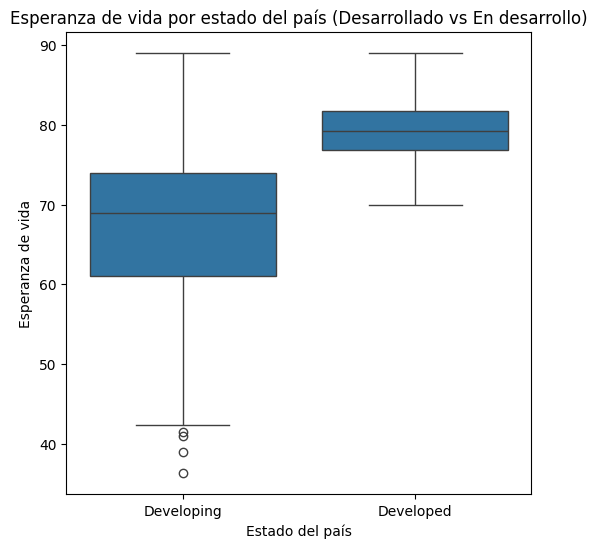

In [ ]:
# Boxplot para comparar 'Life expectancy' según 'Status' (desarrollado/desarrollo)
plt.figure(figsize=(6, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title('Esperanza de vida por estado del país (Desarrollado vs En desarrollo)')
plt.xlabel('Estado del país')
plt.ylabel('Esperanza de vida')
plt.show()

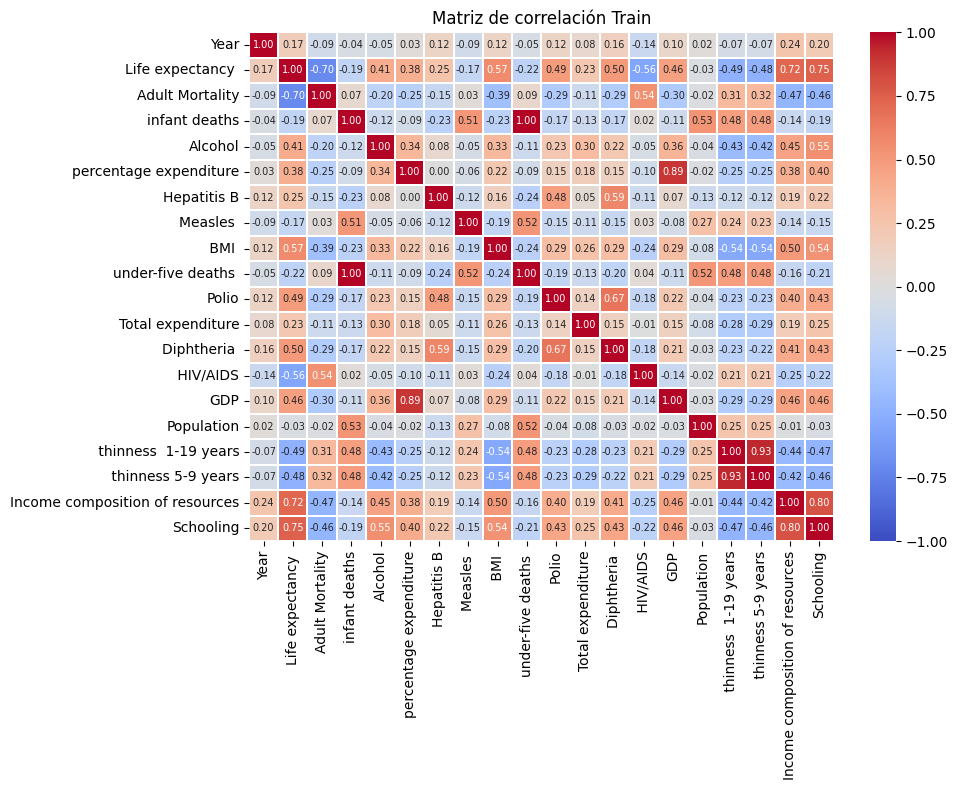

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Grafico
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlación Train', fontsize=12)
plt.tight_layout()
plt.show()

*   ¿Qué teorías puede plantear a partir de este análisis sobre la variable objetivo?

  A partir del análisis, se puede afirmar que los países con mejores sistemas de salud y educación tienden a tener una mayor esperanza de vida, tal como lo indica la alta correlación entre la esperanza de vida y variables como el índice de masa corporal (BMI), la escolaridad y la composición de ingresos. Este hallazgo respalda la teoría de que la salud de una población está fuertemente condicionada por el acceso a recursos económicos y la calidad de la infraestructura educativa.

  Además, la correlación negativa entre la esperanza de vida y variables como la mortalidad infantil y la mortalidad de menores de cinco años refuerza la idea de que mejoras en las condiciones sanitarias y el acceso a servicios médicos de calidad reducen la mortalidad infantil, lo que a su vez incrementa la longevidad general de la población.
  
*   ¿Existen variables con alta correlación?

  Hay algunas variables que muestran alta correlación entre ellas. Por ejemplo:

  **Thinness 1-19 years** y **thinness 5-9 years** tienen una correlación de 0.94, lo que sugiere que son prácticamente redundantes.

  **infant deaths** y **under-five deaths** también tienen una correlación alta (0.91), lo que indica que representan información similar, por lo que podría ser redundante incluir ambas.

  **Schooling** y **Income composition** of resources tienen una correlación de 0.80, indicando una fuerte relación entre el acceso a la educación y la composición de ingresos.

*   ¿Hay variables que se podrían eliminar? ¿Por qué?

  Para la creación de una red neuronal, se podría considerar eliminar variables que estén altamente correlacionadas, ya que no aportan información nueva y pueden generar multicolinealidad. En este aspecto, la variable de año Year fue eliminada del conjunto de datos para optimizar el rendimiento y la relevancia del modelo de clasificación. Aunque el año en que se registraron los datos puede parecer una característica temporal valiosa, su inclusión podría introducir sesgos irrelevantes y no aportar información significativa sobre la expectativa de vida. Además, al eliminar Year, se reduce la complejidad del modelo, evitando posibles problemas de multicolinealidad con otras variables temporales o económicas que ya capturan tendencias a lo largo del tiempo. Esta decisión facilita que el modelo se enfoque en los factores directamente relacionados con la expectativa de vida, mejorando así su capacidad de generalización y precisión predictiva.


### 3. Procesamiento inicial

In [ ]:
# Eliminar valores NA de la variable de interes
df_train = df_train.dropna(subset=['Life expectancy '])
df_test = df_test.dropna(subset=['Life expectancy '])

In [ ]:
# Ahora separamos los datos de entrada en X como variables explicativas y la variable a predecir Y en df_train
X_train, y_train = df_train.drop(['Life expectancy '], axis=1), df_train['Life expectancy ']
display(X_train.head())
y_train.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2614,Timor-Leste,2002,Developing,261.0,3,0.48,5.649123,NaN,0,12.6,4,38.0,3.89,54.0,0.1,48.615520,923825.0,12.1,12.1,0.475,9.8
1459,Lebanon,2014,Developing,99.0,1,1.32,140.377136,81.0,112,65.4,1,75.0,6.39,81.0,0.1,8161.461400,563279.0,4.8,4.9,0.763,13.3
49,Angola,2014,Developing,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
2911,Zambia,2010,Developing,363.0,30,2.47,184.364910,83.0,15754,2.7,45,8.0,4.41,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8
436,Côte d'Ivoire,2011,Developing,419.0,60,3.13,0.000000,62.0,628,25.6,83,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN


,Life expectancy
2614,62.0
1459,74.8
49,51.7
2911,58.0
436,51.7


In [ ]:
# Ahora separamos los datos de entrada en X como variables explicativas y la variable a predecir Y en df_train
X_test, y_test = df_test.drop(['Life expectancy '], axis=1), df_test['Life expectancy ']
display(X_test.head())
y_test.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2616,Timor-Leste,2000,Developing,276.0,3,0.50,49.069672,NaN,0,11.9,4,NaN,3.26,NaN,0.1,422.286330,87167.0,12.2,12.2,0.000,0.0
338,Botswana,2013,Developing,286.0,2,0.01,1.117811,95.0,1,36.8,2,96.0,5.84,95.0,2.8,77.625783,212857.0,7.0,6.7,0.693,12.6
1116,Guyana,2005,Developing,238.0,1,7.35,17.464059,93.0,0,39.0,1,93.0,5.83,93.0,1.8,198.455216,75946.0,5.7,5.5,0.619,11.4
1914,Norway,2011,Developed,67.0,0,6.53,277.355052,NaN,39,59.4,0,94.0,9.14,94.0,0.1,1574.986100,495388.0,0.7,0.7,0.939,17.6
1508,Libya,2013,Developing,134.0,2,0.01,0.000000,96.0,0,62.8,2,96.0,4.33,96.0,0.1,NaN,NaN,5.7,5.5,0.735,13.4


,Life expectancy
2616,58.7
338,64.2
1116,65.0
1914,81.1
1508,72.9


In [ ]:
# Eliminamos la variable año
X_train = X_train.drop(['Year'], axis=1)
X_test = X_test.drop(['Year'], axis=1)

display(X_train.head())
display(X_test.head())

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2614,Timor-Leste,Developing,261.0,3,0.48,5.649123,NaN,0,12.6,4,38.0,3.89,54.0,0.1,48.615520,923825.0,12.1,12.1,0.475,9.8
1459,Lebanon,Developing,99.0,1,1.32,140.377136,81.0,112,65.4,1,75.0,6.39,81.0,0.1,8161.461400,563279.0,4.8,4.9,0.763,13.3
49,Angola,Developing,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
2911,Zambia,Developing,363.0,30,2.47,184.364910,83.0,15754,2.7,45,8.0,4.41,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8
436,Côte d'Ivoire,Developing,419.0,60,3.13,0.000000,62.0,628,25.6,83,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN


,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2616,Timor-Leste,Developing,276.0,3,0.50,49.069672,NaN,0,11.9,4,NaN,3.26,NaN,0.1,422.286330,87167.0,12.2,12.2,0.000,0.0
338,Botswana,Developing,286.0,2,0.01,1.117811,95.0,1,36.8,2,96.0,5.84,95.0,2.8,77.625783,212857.0,7.0,6.7,0.693,12.6
1116,Guyana,Developing,238.0,1,7.35,17.464059,93.0,0,39.0,1,93.0,5.83,93.0,1.8,198.455216,75946.0,5.7,5.5,0.619,11.4
1914,Norway,Developed,67.0,0,6.53,277.355052,NaN,39,59.4,0,94.0,9.14,94.0,0.1,1574.986100,495388.0,0.7,0.7,0.939,17.6
1508,Libya,Developing,134.0,2,0.01,0.000000,96.0,0,62.8,2,96.0,4.33,96.0,0.1,NaN,NaN,5.7,5.5,0.735,13.4


In [ ]:
X_train.isnull().sum()

,0
Country,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,148
percentage expenditure,0
Hepatitis B,444
Measles,0
BMI,26
under-five deaths,0


In [ ]:
X_test.isnull().sum()

,0
Country,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,45
percentage expenditure,0
Hepatitis B,109
Measles,0
BMI,6
under-five deaths,0


Para mejorar la calidad de los datos y garantizar la precisión del análisis, se eliminaron o corrigieron las filas con valores dañados o no útiles. Utilizamos el método de imputación con la estrategia de promedio para reemplazar los valores nulos en variables clave. Este enfoque evita la pérdida de datos valiosos y reduce el sesgo que podría generar la eliminación directa de filas, asegurando así la coherencia y completitud del conjunto de datos.

**Eliminación variable de Año. ¿Qué cree que cambie con series de tiempo?**

Se eliminó la columna del Año porque incorporar series de tiempo en las predicciones de redes neuronales requiere enfoques específicos, como modelos recurrentes, que no hemos cubierto en clase. Al omitir esta variable temporal, el modelo se enfoca en factores estáticos que influyen directamente en la esperanza de vida. Incorporar series de tiempo en el análisis de la esperanza de vida introduciría dinámicas temporales como tendencias y estacionalidades que actualmente no se consideran. Esto requeriría modelos específicos, como redes neuronales recurrentes (RNN), capaces de capturar dependencias a lo largo del tiempo. Además, el preprocesamiento de los datos se volvería más complejo, ya que habría que manejar la secuenciación y potencialmente ajustar el modelo para considerar cambios históricos y futuros. En resumen, el uso de series de tiempo enriquecería el análisis pero aumentaría la complejidad del modelado.

Cuando se trabaja con series de tiempo, el enfoque cambia porque las observaciones están temporalmente correlacionadas.

También, al incorporar series de tiempo, se deben tener en cuenta patrones como tendencias a largo plazo (p. ej., mejora sostenida en la esperanza de vida) y estacionalidad (patrones cíclicos a lo largo de los años).

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Crear el imputador para reemplazar los valores nulos por el promedio
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Listado de columnas a las que quieres aplicar el imputador
columns = ['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ',
           'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
           ' thinness  1-19 years', ' thinness 5-9 years',
           'Income composition of resources', 'Schooling']

# Aplicar el imputador a todas las columnas de una sola vez
X_train[columns] = imputer.fit_transform(X_train[columns])
X_test[columns] = imputer.fit_transform(X_test[columns])

In [ ]:
X_train.isnull().sum()

,0
Country,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0


In [ ]:
X_train.isnull().sum()

,0
Country,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0


In [ ]:
# Modificar el nombre de los paises por un ranking
country_life_expectancy = df.groupby('Country')['Life expectancy '].mean().sort_values()
country_ranking = {country: rank for rank, country in enumerate(country_life_expectancy.index)}

X_train['Country'] = X_train['Country'].map(country_ranking)
X_test['Country'] = X_test['Country'].map(country_ranking)

LE = LabelEncoder()

# Se transforma la variable 'Status' a bool, donde Developing = 1
X_train['Status'] = LE.fit_transform(X_train['Status'])
X_test['Status'] = LE.transform(X_test['Status'])

display(X_train.head())
display(X_test.head())

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2614,54,1,261.0,3,0.48,5.649123,80.947313,0,12.6,4,38.0,3.89,54.0,0.1,48.615520,9.238250e+05,12.1,12.1,0.475000,9.800000
1459,124,1,99.0,1,1.32,140.377136,81.000000,112,65.4,1,75.0,6.39,81.0,0.1,8161.461400,5.632790e+05,4.8,4.9,0.763000,13.300000
49,3,1,348.0,67,8.33,23.965612,64.000000,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2.692466e+06,8.5,8.3,0.527000,11.400000
2911,13,1,363.0,30,2.47,184.364910,83.000000,15754,2.7,45,8.0,4.41,83.0,6.8,1463.213573,1.385330e+05,6.7,6.5,0.533000,11.800000
436,6,1,419.0,60,3.13,0.000000,62.000000,628,25.6,83,58.0,6.42,62.0,3.3,7523.666340,1.270250e+07,6.1,6.0,0.628166,12.028339


,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2616,54,1,276.0,3,0.50,49.069672,81.014675,0,11.9,4,82.094664,3.26,81.287435,0.1,422.286330,8.716700e+04,12.2,12.2,0.000,0.0
338,24,1,286.0,2,0.01,1.117811,95.000000,1,36.8,2,96.000000,5.84,95.000000,2.8,77.625783,2.128570e+05,7.0,6.7,0.693,12.6
1116,58,1,238.0,1,7.35,17.464059,93.000000,0,39.0,1,93.000000,5.83,93.000000,1.8,198.455216,7.594600e+04,5.7,5.5,0.619,11.4
1914,174,0,67.0,0,6.53,277.355052,81.014675,39,59.4,0,94.000000,9.14,94.000000,0.1,1574.986100,4.953880e+05,0.7,0.7,0.939,17.6
1508,91,1,134.0,2,0.01,0.000000,96.000000,0,62.8,2,96.000000,4.33,96.000000,0.1,7377.855152,1.300791e+07,5.7,5.5,0.735,13.4


In [ ]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
display(pd.DataFrame(X_train_scaled, columns=X_train.columns))

# Solo transformar el conjunto de prueba (sin ajustar nuevamente)
X_test_scaled = scaler.transform(X_test)
display(pd.DataFrame(X_test_scaled, columns=X_test.columns))

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.716733,0.469497,0.773663,-0.230318,-1.060227,-0.373665,0.000000,-0.213006,-1.291076,-0.236084,-1.929478,-0.849230,-1.230790,-0.321797,-0.569186,-2.185846e-01,1.626700,1.581782,-0.742677,-6.844869e-01
1,0.607493,0.469497,-0.526855,-0.246310,-0.845926,-0.304627,0.002338,-0.204134,1.350763,-0.253753,-0.330995,0.181592,-0.068021,-0.321797,0.048565,-2.252755e-01,-0.009679,0.004389,0.653787,3.906205e-01
2,-1.681527,0.469497,1.472089,0.281429,0.942469,-0.364280,-0.752030,0.713645,-0.785724,0.335194,-0.633410,-1.088381,-0.800134,0.057855,-0.536391,-1.857627e-01,0.819718,0.749269,-0.490537,-1.930092e-01
3,-1.492352,0.469497,1.592508,-0.014425,-0.552537,-0.282086,0.091087,1.034833,-1.786420,0.005384,-3.225545,-0.634819,0.018110,1.016974,-0.461472,-2.331578e-01,0.416228,0.354921,-0.461444,-7.013981e-02
4,-1.624774,0.469497,2.042070,0.225456,-0.384158,-0.376560,-0.840779,-0.163263,-0.640623,0.229184,-1.065433,0.193962,-0.886266,0.317616,0.000000,3.456634e-17,0.281731,0.245380,0.000000,5.456498e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,0.796668,0.469497,-1.177114,-0.246310,-1.039817,0.156690,0.756706,-0.211501,0.655279,-0.253753,0.576253,-1.286299,0.664093,-0.321797,0.705152,3.456634e-17,0.461060,0.420646,0.745915,1.141643e-01
2338,-0.224878,0.469497,0.275934,0.001567,-1.180133,-0.354257,-0.840779,-0.108689,1.005523,-0.029953,-0.676612,-0.168888,-0.800134,-0.321797,-0.521585,-2.356624e-01,0.102402,0.048206,0.144660,-5.923348e-01
2339,0.985844,0.469497,-0.583050,-0.254306,-0.006579,-0.021024,0.490459,-0.211263,0.790373,-0.259642,0.187432,1.645360,0.405700,-0.321797,-0.213738,-2.350516e-01,-0.525250,-0.521408,0.484078,5.749246e-01
2340,-1.492352,0.469497,1.616591,-0.022421,-0.527025,-0.282762,0.002338,0.835229,-0.860776,-0.000505,0.014623,-0.696669,-0.068021,0.917066,-0.447659,2.899190e-02,0.393812,0.333013,-0.412956,-8.705099e-03


,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.716733,0.469497,0.894081,-0.230318,-1.055124,-0.351415,0.002989,-0.213006,-1.326100,-0.236084,-0.024489,-1.108998,-0.055642,-0.321797,-0.540733,-0.234111,1.649116,1.603690,-3.045872,-3.694788
1,-1.284259,0.469497,0.974360,-0.238314,-1.180133,-0.375987,0.623582,-0.212926,-0.080233,-0.247863,0.576253,-0.045189,0.534897,0.217708,-0.566977,-0.231778,0.483476,0.398737,0.314369,0.175599
2,-0.641063,0.469497,0.589022,-0.246310,0.692451,-0.367611,0.534833,-0.213006,0.029844,-0.253753,0.446646,-0.049312,0.448766,0.017891,-0.557776,-0.234319,0.192066,0.135839,-0.044445,-0.193009
3,1.553369,-2.129940,-0.783748,-0.254306,0.483252,-0.234435,0.002989,-0.209917,1.050554,-0.259642,0.489848,1.315497,0.491831,-0.321797,-0.452961,-0.226535,-0.928741,-0.915756,1.507182,1.711467
4,-0.016785,0.469497,-0.245879,-0.238314,-1.180133,-0.376560,0.667957,-0.213006,1.220673,-0.247863,0.576253,-0.667806,0.577962,-0.321797,-0.011103,0.005668,0.192066,0.135839,0.518020,0.421338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.380483,0.469497,-0.422493,-0.086389,-1.047471,-0.097567,0.623582,-0.211025,0.940478,-0.118295,0.533050,0.482592,0.534897,-0.321797,-0.156234,0.475745,0.236899,0.201563,0.527718,0.728511
582,-1.624774,0.469497,1.985874,0.217460,-0.379055,-0.376560,-3.237008,-0.209204,-0.580581,0.217405,-0.158186,-0.057559,-3.211804,0.137781,-0.011103,0.005668,0.214483,0.179655,-0.018171,-0.044208
583,-1.284259,0.469497,4.129321,-0.238314,0.215376,-0.219268,0.268586,-0.212926,-1.746393,-0.236084,0.619455,-0.090545,0.621028,7.091396,-0.334632,-0.203161,1.559451,1.516057,-0.330526,-0.070140
584,-1.530187,0.469497,2.090237,0.337401,-0.919911,-0.348914,-0.263910,-0.191857,-0.955842,0.376421,-0.330995,-0.288463,-0.326414,2.475635,-0.540744,0.176036,-0.233840,-0.258510,-1.300292,-1.175965


In [ ]:
def categorize_life_expectancy(y):
    if y < 62:
        return 'Low life expectancy'
    elif 62 <= y <= 75:
        return 'Medium life expectancy'
    else:
        return 'High life expectancy'

y_train_class = y_train.apply(categorize_life_expectancy)
y_test_class = y_test.apply(categorize_life_expectancy)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

y_train_class_encoder = encoder.fit_transform(y_train_class.values.reshape(-1, 1))
y_test_class_encoder = encoder.transform(y_test_class.values.reshape(-1, 1))

print(f"y_train_class_encoded shape: {y_train_class_encoder.shape}")
print(f"y_test_class_encoded shape: {y_test_class_encoder.shape}")

y_train_class_encoded shape: (2342, 3)
y_test_class_encoded shape: (586, 3)


In [ ]:
y_train

,Life expectancy
2614,62.0
1459,74.8
49,51.7
2911,58.0
436,51.7
...,...
1932,75.4
1235,67.9
323,76.8
2910,58.2


In [ ]:
y_train_class

,Life expectancy
2614,Medium life expectancy
1459,Medium life expectancy
49,Low life expectancy
2911,Low life expectancy
436,Low life expectancy
...,...
1932,High life expectancy
1235,Medium life expectancy
323,High life expectancy
2910,Low life expectancy


In [ ]:
y_train

,Life expectancy
2614,62.0
1459,74.8
49,51.7
2911,58.0
436,51.7
...,...
1932,75.4
1235,67.9
323,76.8
2910,58.2


In [ ]:
y_train_class_encoder

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Modelos

#### Regresión

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
def train_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}
    best_estimators = {}

    for name, model in models.items():
        print(f"Entrenando {name}...")

        # Búsqueda de hiperparámetros con GridSearchCV
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Mejor modelo encontrado
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model  # Guardar el mejor modelo

        y_pred = best_model.predict(X_test)

        # Evaluar métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "Best Params": grid_search.best_params_
        }

        print(f"\n🔹 Mejor estimador para {name}:\n{best_model}")
        print(f"🔹 Mejores hiperparámetros: {grid_search.best_params_}\n")

    return results, best_estimators

In [ ]:
# Definición de modelos
models = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "SVM": SVR(),
    "Random Forest Regressor": RandomForestRegressor(random_state=SEED)
}

In [ ]:
 # Definición de hiperparámetros para GridSearch
param_grids = {
    "Lasso": {"alpha": [0.01, 0.1, 1, 10], 'selection':['cyclic', 'random']},
    "Ridge": {"alpha": [0.01, 0.1, 1, 10]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Random Forest Regressor": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
}

In [ ]:
# Ejecutar entrenamiento y evaluación con impresión de los mejores modelos
results, best_estimators = train_and_evaluate(models, param_grids, X_train_scaled, y_train, X_test_scaled, y_test)

Entrenando Lasso...

🔹 Mejor estimador para Lasso:
Lasso(alpha=0.01)
🔹 Mejores hiperparámetros: {'alpha': 0.01, 'selection': 'cyclic'}

Entrenando Ridge...

🔹 Mejor estimador para Ridge:
Ridge(alpha=0.1)
🔹 Mejores hiperparámetros: {'alpha': 0.1}

Entrenando SVM...

🔹 Mejor estimador para SVM:
SVR(C=10)
🔹 Mejores hiperparámetros: {'C': 10, 'kernel': 'rbf'}

Entrenando Random Forest Regressor...

🔹 Mejor estimador para Random Forest Regressor:
RandomForestRegressor(max_depth=20, n_estimators=200, random_state=2025)
🔹 Mejores hiperparámetros: {'max_depth': 20, 'n_estimators': 200}



In [ ]:
# Convertir resultados a DataFrame
results_df = pd.DataFrame(results).T
results_df

,MSE,RMSE,MAE,Best Params
Lasso,6.857893,2.618758,1.976613,"{'alpha': 0.01, 'selection': 'cyclic'}"
Ridge,6.690736,2.586646,1.946609,{'alpha': 0.1}
SVM,3.97045,1.992599,1.291801,"{'C': 10, 'kernel': 'rbf'}"
Random Forest Regressor,2.67711,1.636188,1.014814,"{'max_depth': 20, 'n_estimators': 200}"


<Figure size 1000x600 with 0 Axes>

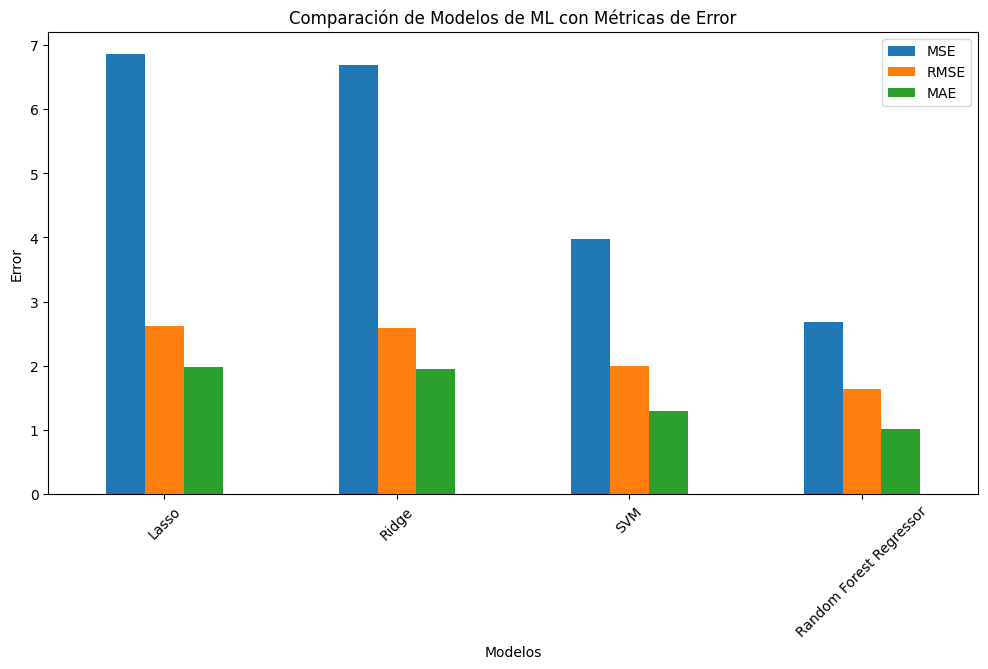

In [ ]:
# Graficar resultados
plt.figure(figsize=(10, 6))
results_df[['MSE', 'RMSE', 'MAE']].plot(kind='bar', figsize=(12,6))
plt.title("Comparación de Modelos de ML con Métricas de Error")
plt.xlabel("Modelos")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

#### Clasificación

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_train_class

,Life expectancy
2614,Medium life expectancy
1459,Medium life expectancy
49,Low life expectancy
2911,Low life expectancy
436,Low life expectancy
...,...
1932,High life expectancy
1235,Medium life expectancy
323,High life expectancy
2910,Low life expectancy


In [ ]:
# Función para entrenar y evaluar modelos de clasificación
def train_and_evaluate_classification(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}
    best_estimators = {}

    for name, model in models.items():
        print(f"Entrenando {name}...")

        # Búsqueda de hiperparámetros con GridSearchCV
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Mejor modelo encontrado
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model

        # Predicciones en train y test
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Evaluar métricas
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')
        f1 = f1_score(y_test, y_test_pred, average='weighted')

        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Best Params": grid_search.best_params_
        }

        print(f"\n🔹 Mejor estimador para {name}:{best_model}")
        print(f"🔹 Mejores hiperparámetros: {grid_search.best_params_}\n")

        # Matriz de confusión en Train y Test
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)

        axes[0].set_title(f"{name} - Train Set")
        disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

        axes[1].set_title(f"{name} - Test Set")
        disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

        print()

        plt.show()

    return results, best_estimators

In [ ]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=SEED)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_class)

# Definir modelos de clasificación
classification_models = {
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Ridge Logit": LogisticRegression(penalty='l2', solver='liblinear'),
    "Lasso Logit": LogisticRegression(penalty='l1', solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=SEED),
}

In [ ]:
# Definir hiperparámetros para GridSearchCV
classification_param_grids = {
    "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "Ridge Logit": {"C": [0.01, 0.1, 1, 10]},
    "Lasso Logit": {"C": [0.01, 0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
}

Entrenando SVC...

🔹 Mejor estimador para SVC:SVC(C=10)
🔹 Mejores hiperparámetros: {'C': 10, 'kernel': 'rbf'}




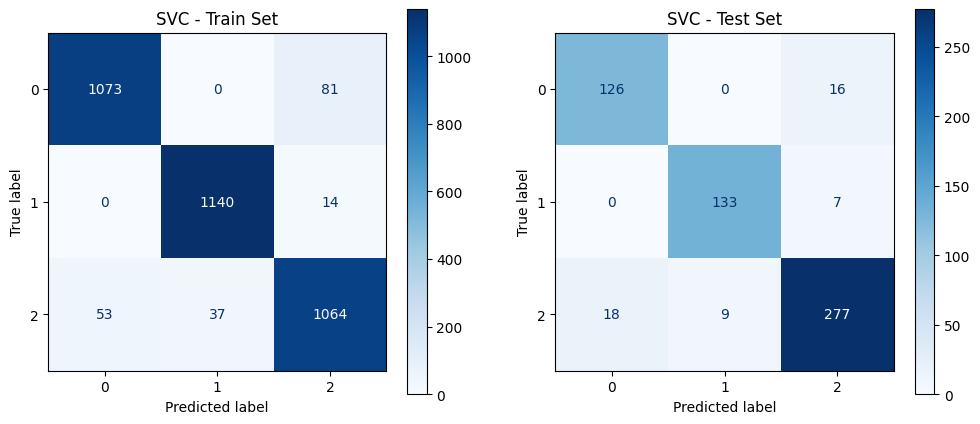

Entrenando Decision Tree...

🔹 Mejor estimador para Decision Tree:DecisionTreeClassifier(max_depth=10)
🔹 Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 2}




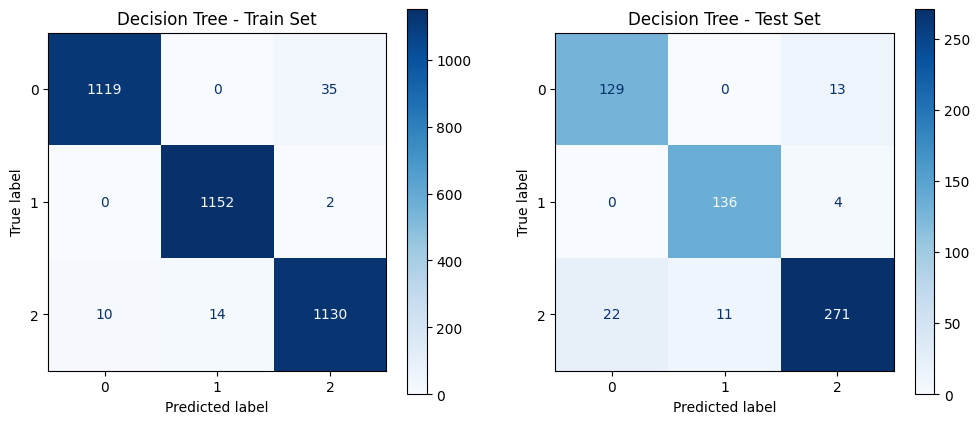

Entrenando Ridge Logit...

🔹 Mejor estimador para Ridge Logit:LogisticRegression(C=10, solver='liblinear')
🔹 Mejores hiperparámetros: {'C': 10}




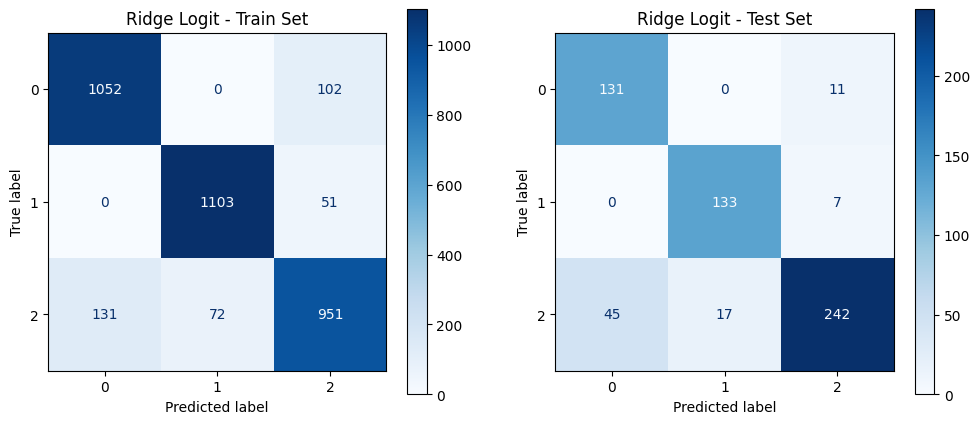

Entrenando Lasso Logit...

🔹 Mejor estimador para Lasso Logit:LogisticRegression(C=10, penalty='l1', solver='liblinear')
🔹 Mejores hiperparámetros: {'C': 10}




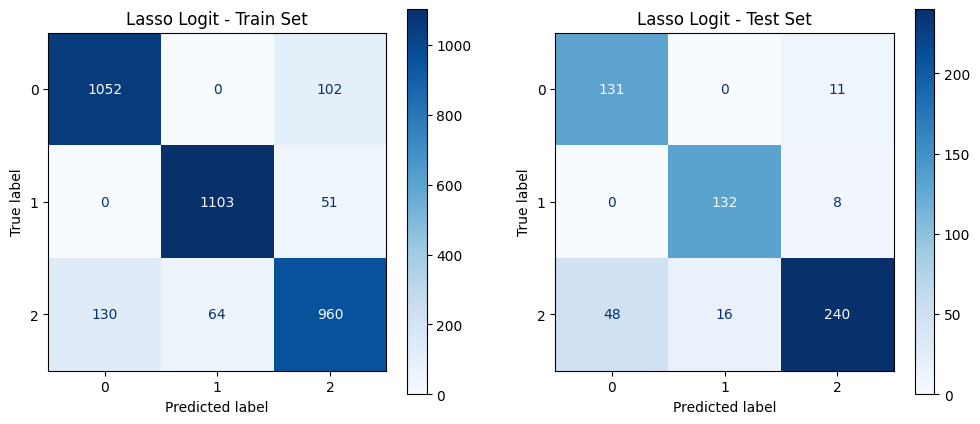

Entrenando Random Forest...

🔹 Mejor estimador para Random Forest:RandomForestClassifier(n_estimators=200, random_state=2025)
🔹 Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 200}




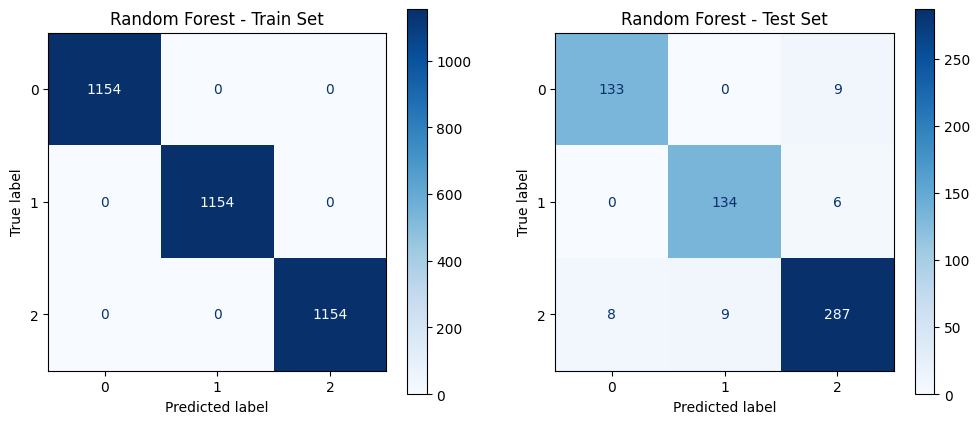

In [ ]:
# Ejecutar entrenamiento y evaluación
classification_results, classification_best_estimators = train_and_evaluate_classification(
    classification_models, classification_param_grids,
    X_train_balanced, y_train_balanced, X_test_scaled, y_test_class
)

In [ ]:
# Convertir resultados a DataFrame y mostrar
classification_results_df = pd.DataFrame(classification_results).T
classification_results_df

,Accuracy,Precision,Recall,F1-Score,Best Params
SVC,0.914676,0.914795,0.914676,0.914693,"{'C': 10, 'kernel': 'rbf'}"
Decision Tree,0.914676,0.916196,0.914676,0.914752,"{'max_depth': 10, 'min_samples_split': 2}"
Ridge Logit,0.863481,0.875052,0.863481,0.863971,{'C': 10}
Lasso Logit,0.858362,0.871136,0.858362,0.859073,{'C': 10}
Random Forest,0.945392,0.945448,0.945392,0.945387,"{'max_depth': None, 'n_estimators': 200}"


<Figure size 1000x600 with 0 Axes>

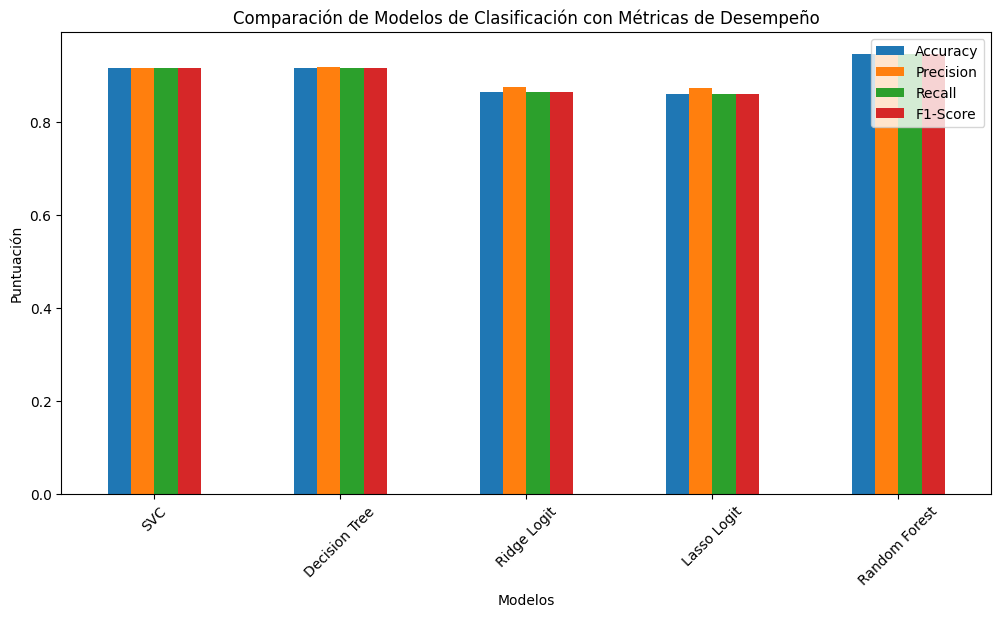

In [ ]:
# Graficar resultados
plt.figure(figsize=(10, 6))
classification_results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12,6))
plt.title("Comparación de Modelos de Clasificación con Métricas de Desempeño")
plt.xlabel("Modelos")
plt.ylabel("Puntuación")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()